<a href="https://colab.research.google.com/github/ramkumarsanthanasekaran/Window-Non-Window-Glass-Classification-Deep-Neural-Network/blob/main/Glass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
input = pd.read_csv("/content/inputs_glass.csv", index_col=False)
output = pd.read_csv("/content/target_glass.csv", index_col=False)

# Transpose DataFrames
input = input.T
output = output.T

# Reset index to default integer index
input.reset_index(inplace=True)
output.reset_index(inplace=True)

In [ ]:
input

,index,0,1,2,3,4,5,6,7
0,1.51571,12.72,3.46,1.56,73.20,0.67,8.09,0.0,0.24
1,1.51763,12.80,3.66,1.27,73.01,0.60,8.56,0.0,0.00
2,1.51589,12.88,3.43,1.40,73.28,0.69,8.05,0.0,0.24
3,1.51748,12.86,3.56,1.27,73.21,0.54,8.38,0.0,0.17
4,1.51763.1,12.61,3.59,1.31,73.29,0.58,8.50,0.0,0.00
...,...,...,...,...,...,...,...,...,...
209,1.51596.1,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26
210,1.51743.1,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00
211,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00
212,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.0,0.00


In [ ]:
output

,index,0
0,0,0
1,0.1,0
2,0.2,0
3,0.3,0
4,0.4,0
...,...,...
209,0.158,0
210,0.159,0
211,0.160,0
212,0.161,0


In [ ]:
input.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   214 non-null    object 
 1   0       214 non-null    float64
 2   1       214 non-null    float64
 3   2       214 non-null    float64
 4   3       214 non-null    float64
 5   4       214 non-null    float64
 6   5       214 non-null    float64
 7   6       214 non-null    float64
 8   7       214 non-null    float64
dtypes: float64(8), object(1)
memory usage: 15.2+ KB


In [ ]:
input['index'] = pd.to_numeric(input['index'], errors='coerce')

In [ ]:
input.columns=["Refractive_Index","Sodium","Magnesium","Aluminium","Silicon","Potassium","Calcium","Barium","Iron"]

In [ ]:
input.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Refractive_Index  178 non-null    float64
 1   Sodium            214 non-null    float64
 2   Magnesium         214 non-null    float64
 3   Aluminium         214 non-null    float64
 4   Silicon           214 non-null    float64
 5   Potassium         214 non-null    float64
 6   Calcium           214 non-null    float64
 7   Barium            214 non-null    float64
 8   Iron              214 non-null    float64
dtypes: float64(9)
memory usage: 15.2 KB


In [ ]:
output.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   index   214 non-null    object
 1   0       214 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.5+ KB


In [ ]:
output=output.drop('index',axis=1)

In [ ]:
output.columns=["output"]

In [ ]:
output['output'] = pd.to_numeric(output['output'], errors='coerce').astype(np.float64)

In [ ]:
output.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   output  214 non-null    float64
dtypes: float64(1)
memory usage: 1.8 KB


In [ ]:
output

,output
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
209,0.0
210,0.0
211,0.0
212,0.0


In [ ]:
combined=pd.concat([input,output],axis=1)
combined

,Refractive_Index,Sodium,Magnesium,Aluminium,Silicon,Potassium,Calcium,Barium,Iron,output
0,1.51571,12.72,3.46,1.56,73.20,0.67,8.09,0.0,0.24,0.0
1,1.51763,12.80,3.66,1.27,73.01,0.60,8.56,0.0,0.00,0.0
2,1.51589,12.88,3.43,1.40,73.28,0.69,8.05,0.0,0.24,0.0
3,1.51748,12.86,3.56,1.27,73.21,0.54,8.38,0.0,0.17,0.0
4,NaN,12.61,3.59,1.31,73.29,0.58,8.50,0.0,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...
209,NaN,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,0.0
210,NaN,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,0.0
211,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00,0.0
212,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.0,0.00,0.0


In [ ]:
combined.dropna(axis=0,inplace=True)
combined

,Refractive_Index,Sodium,Magnesium,Aluminium,Silicon,Potassium,Calcium,Barium,Iron,output
0,1.51571,12.72,3.46,1.56,73.20,0.67,8.09,0.0,0.24,0.0
1,1.51763,12.80,3.66,1.27,73.01,0.60,8.56,0.0,0.00,0.0
2,1.51589,12.88,3.43,1.40,73.28,0.69,8.05,0.0,0.24,0.0
3,1.51748,12.86,3.56,1.27,73.21,0.54,8.38,0.0,0.17,0.0
5,1.51761,12.81,3.54,1.23,73.24,0.58,8.39,0.0,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...
204,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,0.0
207,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,0.0
208,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,0.0
211,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00,0.0


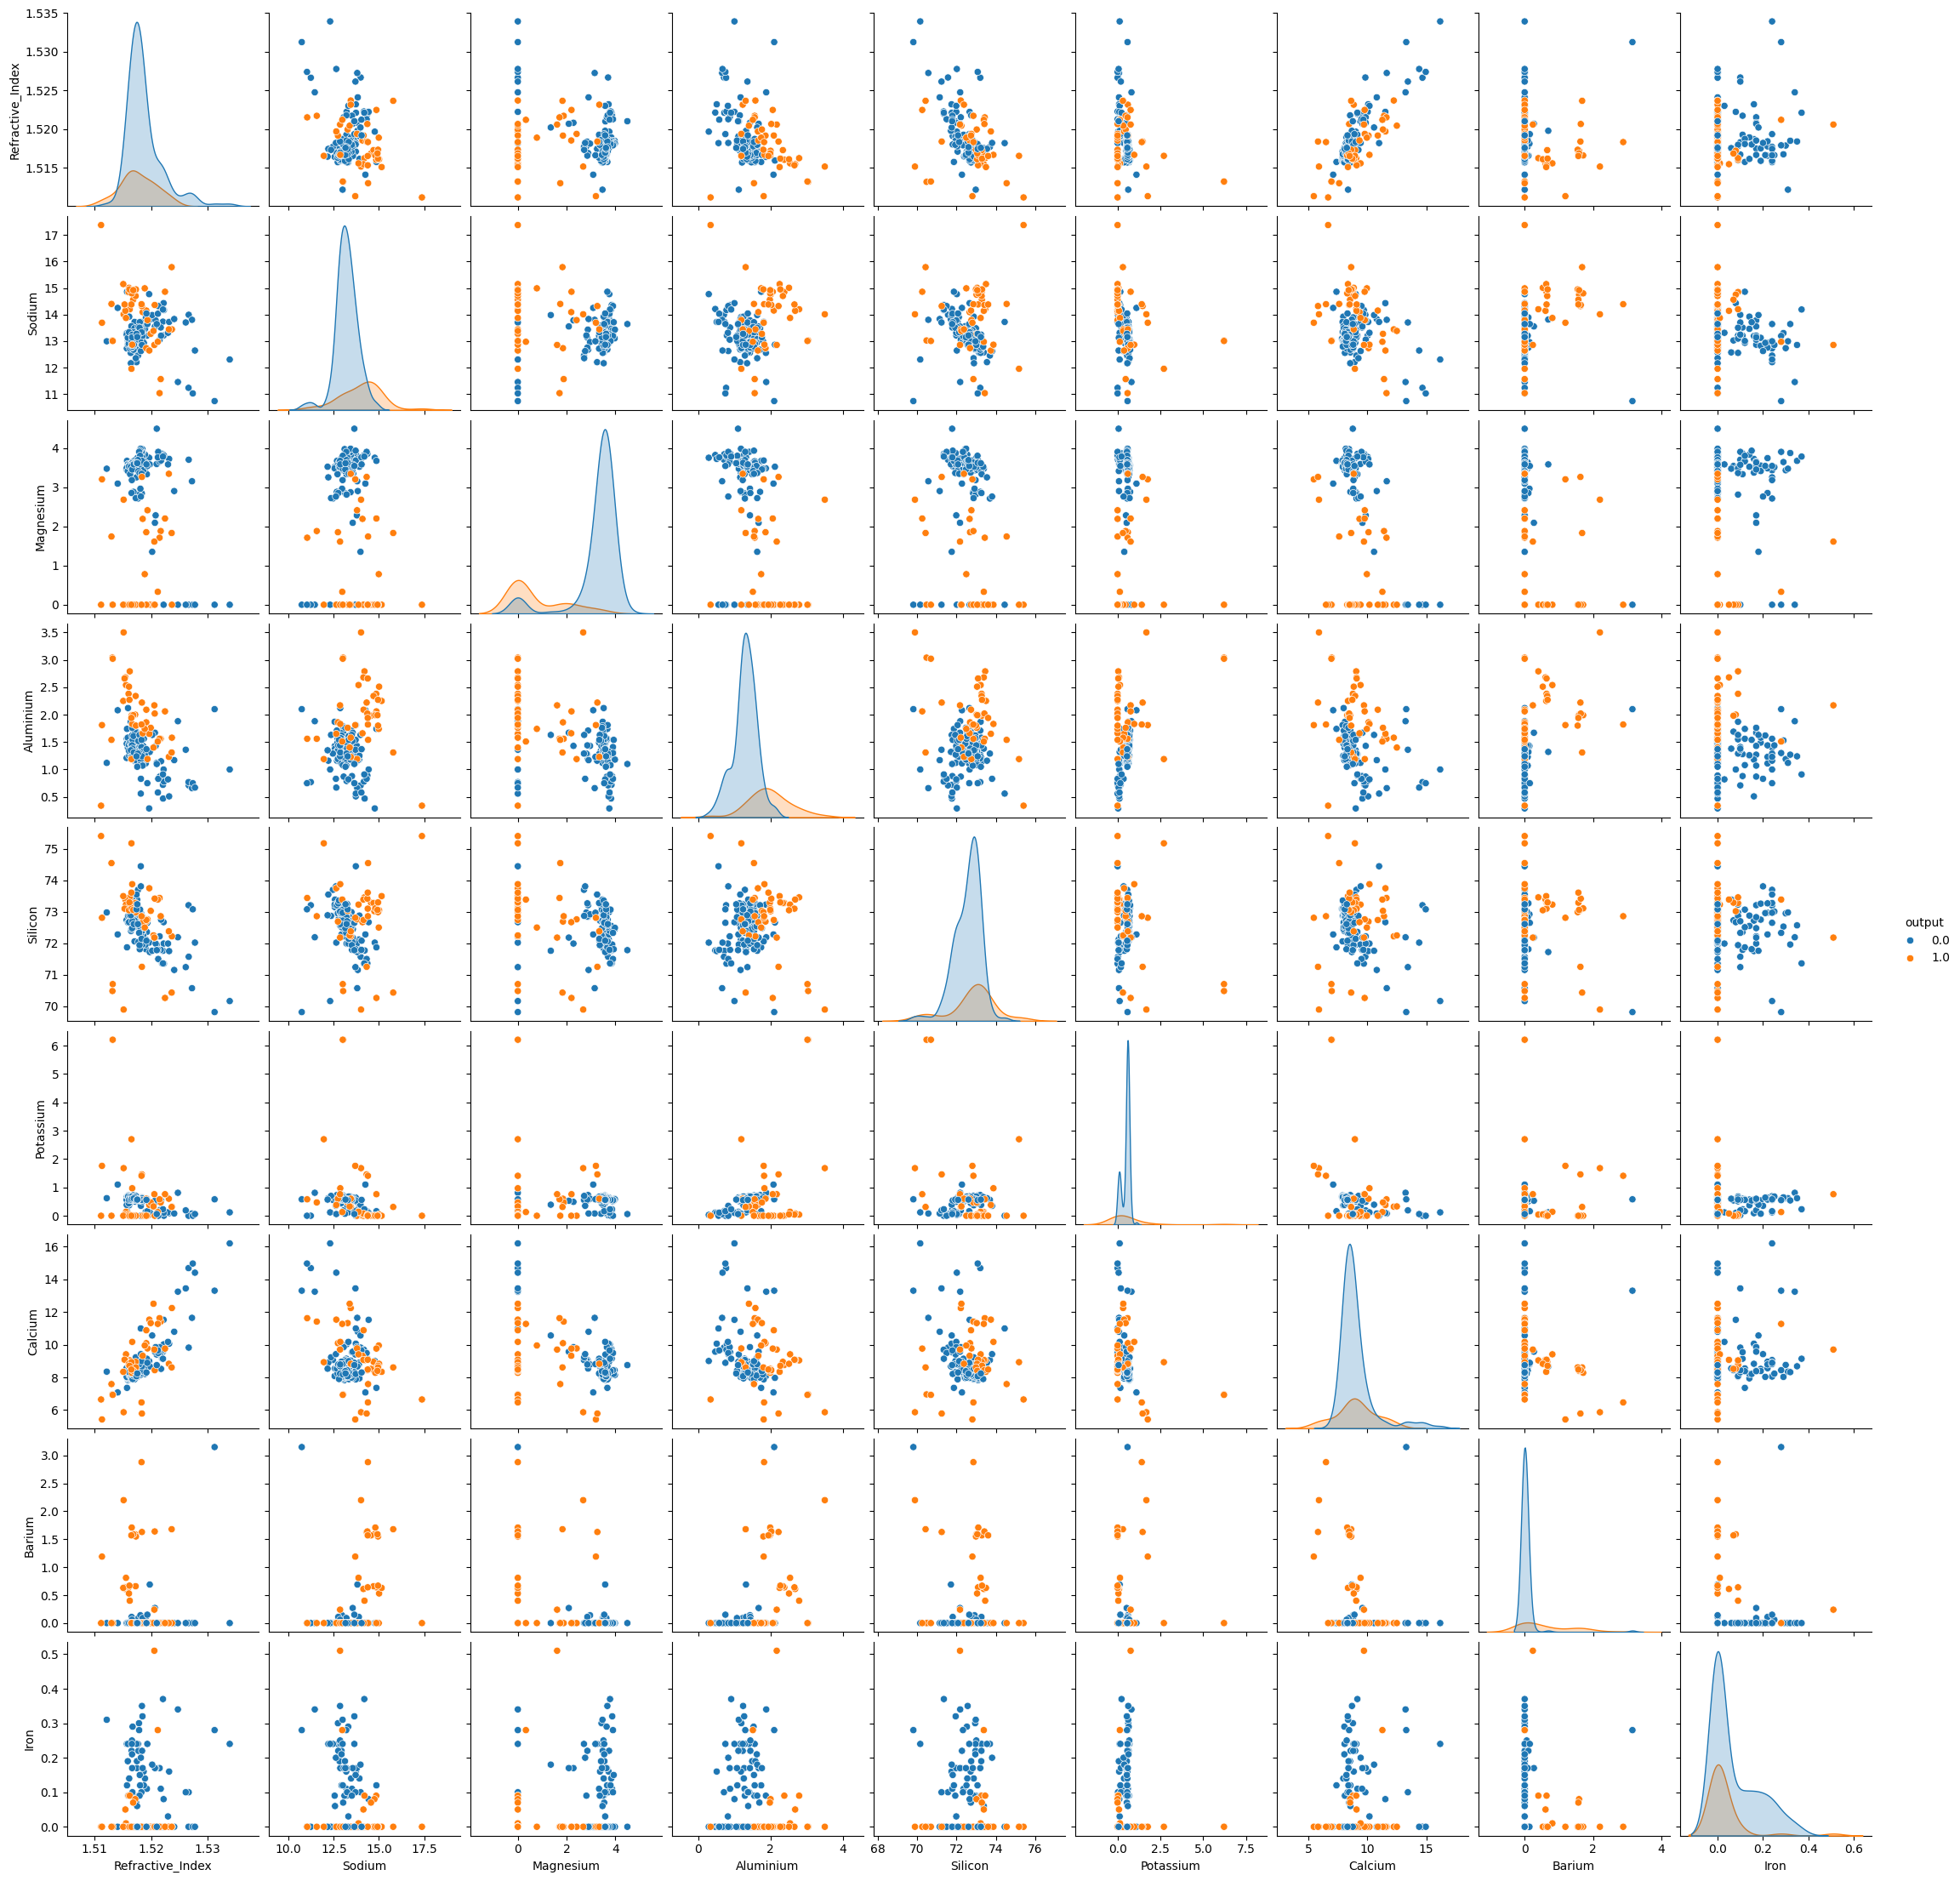

In [ ]:
sns.pairplot(data=combined,hue='output')

In [ ]:
output_new=combined.pop("output")

In [ ]:
input_new=combined

In [ ]:
input_new.shape

(178, 9)

In [ ]:
output_new.shape

(178,)

In [ ]:
output_new

,output
0,0.0
1,0.0
2,0.0
3,0.0
5,0.0
...,...
204,0.0
207,0.0
208,0.0
211,0.0


In [ ]:
normalize=tf.keras.layers.Normalization()
normalize.adapt(np.array(input_new))

In [ ]:
model=tf.keras.models.Sequential([
    normalize,
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(256,activation='relu'),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid'),
])

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [ ]:
model.fit(input_new,output_new,epochs=100)

Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7828 - loss: 0.6666
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9381 - loss: 0.3955 
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9566 - loss: 0.1756 
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9507 - loss: 0.1228 
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9426 - loss: 0.1372 
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9623 - loss: 0.1260 
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9693 - loss: 0.0837 
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9847 - loss: 0.0510 
Epoch 9/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9669 - loss: 0.0634 
Epoch 10/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9781 - loss: 0.0447 
Epoch 11/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9863 - loss: 0.0468 
Epoch 12/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9815 - loss

In [ ]:
x1=model.predict(input_new[:])
a=0
y=np.round(x1)
for i in y:
  a+=1
  if(i==1):
    print("window glass ",a)
  else:
    print("non window glass ",a)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
non window glass  1
non window glass  2
non window glass  3
non window glass  4
non window glass  5
non window glass  6
non window glass  7
non window glass  8
non window glass  9
non window glass  10
non window glass  11
non window glass  12
non window glass  13
non window glass  14
non window glass  15
non window glass  16
non window glass  17
non window glass  18
non window glass  19
non window glass  20
non window glass  21
non window glass  22
non window glass  23
non window glass  24
non window glass  25
non window glass  26
non window glass  27
non window glass  28
non window glass  29
non window glass  30
non window glass  31
non window glass  32
non window glass  33
non window glass  34
non window glass  35
non window glass  36
non window glass  37
non window glass  38
non window glass  39
non window glass  40
non window glass  41
non window glass  42
non window glass  43
non window glass  44
non window glass  45
non window glass  46
non w

In [ ]:
x=output_new[:]
y1=np.round(x)
a=0
for i in y:
  a+=1
  if(i==1):
    print("window glass ",a)
  else:
    print("non window glass ",a)

non window glass  1
non window glass  2
non window glass  3
non window glass  4
non window glass  5
non window glass  6
non window glass  7
non window glass  8
non window glass  9
non window glass  10
non window glass  11
non window glass  12
non window glass  13
non window glass  14
non window glass  15
non window glass  16
non window glass  17
non window glass  18
non window glass  19
non window glass  20
non window glass  21
non window glass  22
non window glass  23
non window glass  24
non window glass  25
non window glass  26
non window glass  27
non window glass  28
non window glass  29
non window glass  30
non window glass  31
non window glass  32
non window glass  33
non window glass  34
non window glass  35
non window glass  36
non window glass  37
non window glass  38
non window glass  39
non window glass  40
non window glass  41
non window glass  42
non window glass  43
non window glass  44
non window glass  45
non window glass  46
non window glass  47
non window glass  48
n

In [ ]:
cm=tf.math.confusion_matrix(labels=y1,predictions=y)
cm

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[136,   0],
       [  0,  42]], dtype=int32)>

<Axes: >

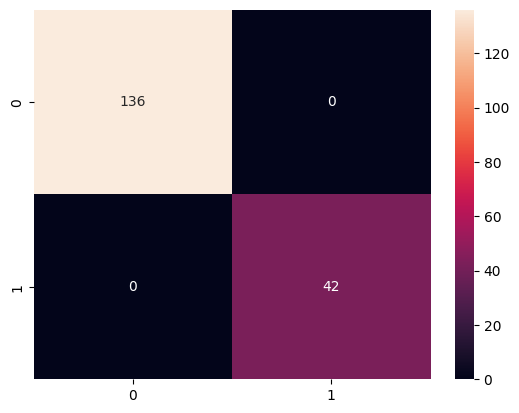

In [ ]:
sns.heatmap(cm,annot=True,fmt='d')